# Santander Customer Satisfaction
https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
import cPickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

1. Exploratory analysis
-----------------------

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [4]:
test.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
75813,151831,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40243.200000
75814,151832,2,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146961.300000
75815,151833,2,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,167299.770000
75816,151834,2,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117310.979016
75817,151837,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117310.979016


In [5]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,117235.809430,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,182664.598503,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5163.750000,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67870.612500,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106409.160000,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118756.252500,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,22034738.760000,1.000000


In [3]:
print plt.style.available
plt.style.use('ggplot')

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [4]:
(train['TARGET']==1).sum()

3008

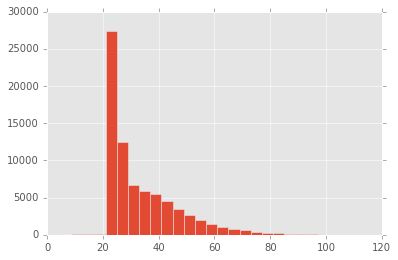

In [5]:
# var15 is AGE
_ = train['var15'].hist(bins=25)

In [6]:
# under 23 do not complain
print len(train['TARGET'][train.var15<23])
print sum(train['TARGET'][train.var15<23])

1212
0


## Combine train and test sets

In [7]:
## use for spltting up combined train+test data, recording predictions
labels = train['TARGET'].values
df_train = train.drop(['TARGET'], axis=1)
df_test = test.copy()
id_test = test['ID']
piv_train = train.shape[0]

In [10]:
#Creating a DataFrame with train+test data
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

# Removing id
# we can also remove id later
df_all = df_all.drop(['ID'], axis=1)
#(df_all.isnull().sum() / df_all.shape[0])

In [72]:
# count number of zeros
df_all['n0'] = (df_all==0).sum(axis=1)

In [11]:
#Filling nan
df_all = df_all.fillna(-1)
df_all_copy = df_all.copy()

---


### var38

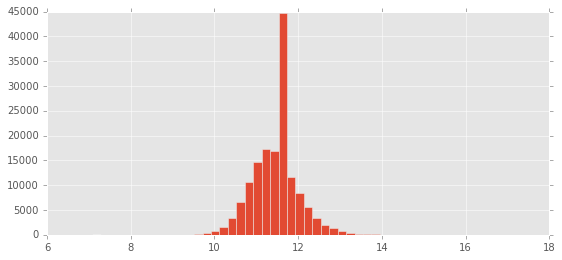

In [75]:
# look at most important feature
plt.hist(np.log(df_all['var38']), bins=50)
plt.gcf().set_size_inches(9,4)
plt.show()

---
2. Feature engineering
----------------------

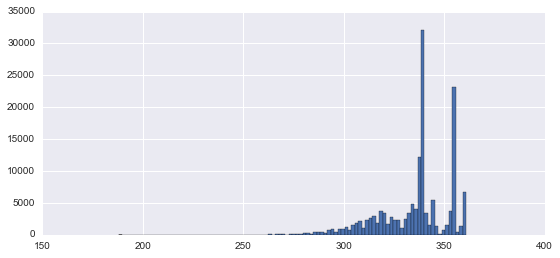

In [34]:
# look at distribution of number of zeros per row
plt.hist(df_all['n0'], bins=100)
plt.gcf().set_size_inches(9,4)
plt.show()

### TODO: PCA reduced sessions

In [478]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=3, copy=True, whiten=False)

# fit the data
pca.fit(df_all)

# Print the components and the amount of variance in the data contained in each dimension
print sum(pca.explained_variance_ratio_)
pca.explained_variance_ratio_

0.844458652792


array([ 0.62662397,  0.14847085,  0.06936383])

In [479]:
# reduce the data with pca
df_pca = pca.transform(df_all)
df_pca[:5]

array([[ 69713134.35410738,  15506616.87953989,   7222578.09718822],
       [ 69713135.75172846,  15506616.86019383,   7222578.07762365],
       [ 69713134.33267833,  15506616.83488744,   7222578.05676919],
       [ 69713134.33409454,  15506616.83951956,   7222578.06029954],
       [ 69713131.96602239,  15506614.72698293,   7222574.84303513]])

In [480]:
df_all['pca1'] = df_pca[:,0]
df_all['pca2'] = df_pca[:,1]
df_all['pca3'] = df_pca[:,2]
#df_all['pca4'] = df_pca[:,3]
#df_all['pca5'] = df_pca[:,4]
df_all.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,n0,pca1,pca2,pca3
0,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,39205.170000,356,69713134.354107,15506616.879540,7222578.097188
1,2,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,49278.030000,330,69713135.751728,15506616.860194,7222578.077624
2,2,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,67333.770000,341,69713134.332678,15506616.834887,7222578.056769
3,2,37,0,195,195,0,0,0,0,0,...,0,0,0,0,0,64007.970000,310,69713134.334095,15506616.839520,7222578.060300
4,2,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,117310.979016,320,69713131.966022,15506614.726983,7222574.843035


## Train and test sets

In [443]:
# look at important features: engineered 'n0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5'
features = ['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult3', 
'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 
'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_ult1', 'ind_var8_0', 
'ind_var30_0', 'ind_var30', 'num_op_var41_hace2', 'num_op_var41_ult3', 
'num_var37_med_ult2', 'saldo_var5', 'saldo_var8', 'saldo_var26', 'saldo_var30', 
'saldo_var37', 'saldo_var42', 'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 
'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3',
'num_med_var45_ult3', 'num_meses_var5_ult3', 'num_meses_var39_vig_ult3',
'num_op_var39_comer_ult1', 'num_op_var41_efect_ult3', 'num_op_var39_efect_ult1',
'num_var43_recib_ult1', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1',
'num_var45_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 
'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var8_hace2',
'saldo_medio_var8_ult1', 'saldo_medio_var8_ult3', 'saldo_medio_var12_ult3',
'saldo_medio_var13_corto_hace2', 'var38', 'n0', 'pca1', 'pca2', 'pca3']
print len(features)
df_sel = df_all[features]

53


In [481]:
#Splitting train and test
vals = df_all.values
X = vals[:piv_train]
X_test_submit = vals[piv_train:]
y = labels

### Train/Test with normalized features

In [378]:
# normalize data
from sklearn.preprocessing import normalize
df_norm = normalize(df_sel, axis=0)

In [379]:
#Splitting train and test
vals = df_norm
X = vals[:piv_train]
X_test_submit = vals[piv_train:]
y = labels

In [380]:
print y.shape
print X.shape
print X_test_submit.shape

(76020,)
(76020, 53)
(75818, 53)


---

Split train data further into train/validation/test sets
---------------

In [13]:
from sklearn import cross_validation

** convert labels to vector**

In [27]:
y_copy = y.copy()
print y_copy.shape

(76020,)


In [232]:
# reformat labels as vector
def reformat(labels, num_labels=12):
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)  # convert label to vector
  return labels

In [233]:
## variable for new label vectors
y_vec = reformat(y_copy)
print y_vec.shape

(213451, 12)


In [237]:
## keep copy of X_test_submit
X_test_copy = X_test_submit.copy()
#X_test_submit = X_test_copy.copy()

In [329]:
## convert test submission dtype
X_test_submit = X_test_norm.astype('float32')

In [330]:
## split normalized data into train and test
X_tv, X_test, y_tv, y_test = cross_validation.train_test_split(X_norm.astype('float32'), \
                                                               y_vec.astype('float32'), test_size=.05, random_state=205)

X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(X_tv, y_tv, \
                                                                       test_size=.05, random_state=71511)

In [482]:
## split into train and validation
## use X,y for full training data
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(X, y, test_size=.1, 
                                                                       stratify=y, 
                                                                       random_state=429)

## Grid search
http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html  
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [89]:
from sklearn import metrics
from sklearn import grid_search

## Make scorer
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, average='binary')

### i. Random forest
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [85]:
## create cv search objec
from sklearn.ensemble import RandomForestClassifier
'''
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, \
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, \
                            max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, \
                            n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
'''
#clf = RandomForestClassifier(n_estimators=100)
est = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=427)
parameters = {'max_depth': [6, None]
             }
reg = grid_search.GridSearchCV(est, parameters, scoring=auc_scorer, cv=3)

### i-a. Extra Trees
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [516]:
# TODO: extremely randomized forests
from sklearn.ensemble import ExtraTreesClassifier
est = ExtraTreesClassifier(n_estimators=128,max_features= 30,criterion= 'entropy',
                            min_samples_split= 2,max_depth= 30, min_samples_leaf= 2, 
                            n_jobs = -1, random_state=429)    
parameters = {'max_depth': [30, None]
             }
reg = grid_search.GridSearchCV(est, parameters, scoring=auc_scorer, cv=3)

# train the estimator directly on data
# est.fit(X, y)
# print est

### ii. SVM
http://scikit-learn.org/stable/modules/svm.html

In [ ]:
from sklearn import svm
# Setup a Classifier
clf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, \
                  shrinking=True, probability=False, tol=0.001, cache_size=200, \
                  class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)
# tune parameter with at least 3 settings
parameters = {'C': (1.0, 0.2),
             }

In [ ]:
## PCA reduced data
X_reduced = pca.transform(X)
X_test_reduced = pca.transform(X_test)

### iii. XGBoost
https://github.com/dmlc/xgboost/blob/master/python-package/xgboost/sklearn.py

In [484]:
#Classifier
# try using... objective: multi:softprob, rank:pairwise
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

ratio = float(np.sum(y == 1)) / np.sum(y==0)
est = XGBClassifier(max_depth=8, learning_rate=0.1, n_estimators=320,
                    objective='binary:logistic', subsample=0.8, colsample_bytree=0.8, 
                    min_child_weight=3, scale_pos_weight=ratio, seed=429)                  

param = {
    'objective':'multi:softprob',                    
    'max_depth':6, 
    'learning_rate':0.25, 
    'n_estimators':43,                 
    'subsample':0.6, 
    'colsample_bytree':0.6,
    'num_class' :12
    }

In [485]:
eval_set = [(X_train,y_train), (X_valid,y_valid)]

In [486]:
# try using... eval_metric: mlogloss, merror, ndcg@n-, logloss, auc
est.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=50, eval_metric='auc')

Will train until validation_1 error hasn't decreased in 50 rounds.
[0]	validation_0-auc:0.500000	validation_1-auc:0.500000
[1]	validation_0-auc:0.500000	validation_1-auc:0.500000
[2]	validation_0-auc:0.500000	validation_1-auc:0.500000
[3]	validation_0-auc:0.500000	validation_1-auc:0.500000
[4]	validation_0-auc:0.500000	validation_1-auc:0.500000
[5]	validation_0-auc:0.500000	validation_1-auc:0.500000
[6]	validation_0-auc:0.500000	validation_1-auc:0.500000
[7]	validation_0-auc:0.500000	validation_1-auc:0.500000
[8]	validation_0-auc:0.500000	validation_1-auc:0.500000
[9]	validation_0-auc:0.500000	validation_1-auc:0.500000
[10]	validation_0-auc:0.500000	validation_1-auc:0.500000
[11]	validation_0-auc:0.500000	validation_1-auc:0.500000
[12]	validation_0-auc:0.500000	validation_1-auc:0.500000
[13]	validation_0-auc:0.500000	validation_1-auc:0.500000
[14]	validation_0-auc:0.500000	validation_1-auc:0.500000
[15]	validation_0-auc:0.500000	validation_1-auc:0.500000
[16]	validation_0-auc:0.500000	

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=3, missing=None, n_estimators=320, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=0.0411987070619, seed=429, silent=True,
       subsample=0.8)

**Save model for later**

In [57]:
#! mkdir models

In [521]:
# save the classifier
with open('models/my_ext_2.pkl', 'wb') as f:
    cPickle.dump(est, f)    

In [483]:
# load it again
with open('models/my_xgb_2.pkl', 'rb') as f:
    clf_loaded = cPickle.load(f)
print clf_loaded

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=3, missing=nan, n_estimators=256, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=0.0411987070619, seed=415, silent=True,
       subsample=1.0)


In [437]:
# assign loaded model to "est"
est = clf_loaded

3. Fit with grid search
------------------------

In [517]:
## fit data with random forest
reg.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=30, max_features=30, max_leaf_nodes=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=-1,
           oob_score=False, random_state=429, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [30, None]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=make_scorer(roc_auc_score), verbose=0)

In [520]:
## get the best predictor
est = reg.best_estimator_
est

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=30, max_features=30, max_leaf_nodes=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=-1,
           oob_score=False, random_state=429, verbose=0, warm_start=False)

## Look at prediction performance

In [504]:
## predict classes
ypred = est.predict(X)

In [505]:
# view the results, my_xgb_2
print metrics.classification_report(y, ypred)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     73012
          1       0.99      0.06      0.11      3008

avg / total       0.96      0.96      0.95     76020



In [48]:
# view the results, my_rf_1
print metrics.classification_report(y, ypred)

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     73012
          1       0.35      0.90      0.50      3008

avg / total       0.97      0.93      0.94     76020



In [519]:
## ext, predict probabilities
ypred = est.predict_proba(X)
print metrics.roc_auc_score(y, ypred[:,1])

0.904821346586


In [487]:
## xgb, predict probabilities
ypred = est.predict_proba(X)
print metrics.roc_auc_score(y, ypred[:,1])

0.860005361258


In [121]:
## rf, predict probabilities
ypred = est.predict_proba(X)
print metrics.roc_auc_score(y, ypred[:,1])

0.96753999461


---
## Generate submission

In [522]:
## predict test, class probabilities
ypred_submit = est.predict_proba(X_test_submit)
print X_test_submit.shape
print ypred_submit.shape
print ypred_submit[:12]

(75818, 373)
(75818, 2)
[[ 0.97531381  0.02468619]
 [ 0.97710959  0.02289041]
 [ 0.99168889  0.00831111]
 [ 0.9417563   0.0582437 ]
 [ 0.99005642  0.00994358]
 [ 0.87017838  0.12982162]
 [ 0.93541667  0.06458333]
 [ 0.89414334  0.10585666]
 [ 0.97353123  0.02646877]
 [ 0.953741    0.046259  ]
 [ 0.98681467  0.01318533]
 [ 0.98914652  0.01085348]]


In [523]:
# Generate submission: stack ids and targets together into dataframe
'''
# old version -- 
sub = pd.DataFrame(np.column_stack(id_test, ypred_submit[:,1])), columns=['ID', 'TARGET'])
'''

sub = pd.concat([id_test, pd.Series(ypred_submit[:,1], name='TARGET')], axis=1)

# write dataframe to csv
sub.to_csv('../submit/ext2_20160429.csv',index=False, float_format='%.16f')

In [510]:
sub.dtypes

ID          int64
TARGET    float64
dtype: object

#### change pred for age (var15) < 23 to 0

In [511]:
# remember features that predict 0
var15 = test['var15']
saldo_medio_var5_hace2 = test['saldo_medio_var5_hace2']
saldo_var33 = test['saldo_var33']
var38 = test['var38']

In [524]:
# Under 23 year olds are always happy
ypred_submit[list(var15.index[var15 < 23]), 1] = 0
#ypred_submit[list(saldo_medio_var5_hace2.index[saldo_medio_var5_hace2 > 160000]), 1] = 0
ypred_submit[list(saldo_var33.index[saldo_var33 > 0]), 1] = 0
ypred_submit[list(var38.index[var38 > 3988596]), 1] = 0
print ypred_submit[:8]
# from the original R script
#preds[NV>0]=0
#preds[V21>7500]=0

# write dataframe to csv
sub = pd.concat([id_test, pd.Series(ypred_submit[:,1], name='TARGET')], axis=1)
sub.to_csv('../submit/ext2_var15_20160429.csv',index=False, float_format='%.16f')

[[ 0.97531381  0.02468619]
 [ 0.97710959  0.02289041]
 [ 0.99168889  0.00831111]
 [ 0.9417563   0.0582437 ]
 [ 0.99005642  0.00994358]
 [ 0.87017838  0.12982162]
 [ 0.93541667  0.        ]
 [ 0.89414334  0.10585666]]


### TODO: Voting Classifier

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [131]:
## predict using a second model and average the results
ypred_2 = est_2.predict_proba(X_test_submit)
ypred_avg = (.2 * ypred_submit) + (.8 * ypred_2)
ypred_avg[:10]

array([[  9.33448022e-01,   6.65520288e-02],
       [  9.62528953e-01,   3.74710348e-02],
       [  9.99925745e-01,   7.42562042e-05],
       [  9.99568772e-01,   4.31227818e-04],
       [  9.98117258e-01,   1.88275319e-03],
       [  8.86325098e-01,   1.13674911e-01],
       [  9.61121901e-01,   3.88780951e-02],
       [  8.96974891e-01,   1.03025138e-01],
       [  9.71420058e-01,   2.85799215e-02],
       [  9.89302377e-01,   1.06976180e-02]])

---
iv. Tensorflow
----------

> **1-2 hidden layers **<br>
> steps 5001, L2 reg .001, hidden 1024, rate (.5, 1000, .8), Test accuracy: **58.78**%<br>
> steps 9001, L2 reg .001, hidden 1024x500, keep .9, rate (.05 adagrad), Test accuracy: **58.78**%<br>
> steps 9001, L2 reg .001, hidden 1024x300, keep 1., rate (.01 adagrad), Test accuracy: **58.17**%<br>

> **1-2 hidden layers, init low w, b**<br>
> steps 5001, L2 reg .0002, hidden 1024x500, keep 1., rate (.1 adagrad), Test accuracy: **58.78**%<br>

> **3 hidden layers **<br>
> steps 9001, L2 reg .001, hidden 1024x300x50, rate (.01 adagrad), Test accuracy: **58.17**%<br>

> **PCA 40 dims **<br>
> steps 9001, L2 reg .001, hidden 1024x300x50, rate (.01 adagrad), Test accuracy: **58.17**%<br>

> **107 features (del 'first_browser') **<br>
> steps 5001, L2 reg .0002, hidden 1024x300x50, rate (.1 adagrad), Test accuracy: **58.04**%<br>

In [244]:
import tensorflow as tf

In [245]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [260]:
def weight_variable(shape, stddev=0.1):
  initial = tf.truncated_normal(shape, stddev=stddev)
  return tf.Variable(initial)

def bias_variable(shape, constant=0.):
  initial = tf.constant(constant, shape=shape)
  return tf.Variable(initial)

** Build graph**

In [248]:
print X_train.shape
print X_train.dtype
print X_valid.shape
print X_test.shape
print y_train[:3]
print y_train.shape
print y_valid.shape
print y_test.shape

print X_test_submit.shape

(192639, 316)
float32
(10139, 316)
(10673, 316)
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
(192639, 12)
(10139, 12)
(10673, 12)
(62096, 316)


In [331]:
reg_L2 = 0.0002
batch_size = 128
num_hidden_1 = 1024
#num_hidden_2 = 300
#num_hidden_3 = 50
num_features = X_train.shape[1]
num_labels = 12

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, num_features))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(X_valid)
  tf_test_dataset = tf.constant(X_test)
  tf_test_submit = tf.constant(X_test_submit)
  
  # Variables.
  w = weight_variable(shape=[num_features, num_hidden_1])
  b = bias_variable(shape=[num_hidden_1])

  #w2 = weight_variable(shape=[num_hidden_1, num_hidden_2])
  #b2 = bias_variable(shape=[num_hidden_2])

  #w3 = weight_variable(shape=[num_hidden_2, num_hidden_3])
  #b3 = bias_variable(shape=[num_hidden_3])

  w4 = weight_variable(shape=[num_hidden_1, num_labels])
  b4 = bias_variable(shape=[num_labels])
  
  # Training computation.
  def model(data):
    h = tf.nn.relu(tf.matmul(data, w) + b)
    ##Dropout
    keep_prob = tf.constant(1.)
    #h2 = tf.tanh(tf.matmul(h, w2) + b2)
    #h2_drop = tf.nn.dropout(h2, keep_prob)
    #h3 = tf.tanh(tf.matmul(h2, w3) + b3)
    #h3_drop = tf.tanh(tf.matmul(h2_drop, w3) + b3)
    #h3_drop = tf.nn.dropout(h3_drop, keep_prob)
    h4 = tf.matmul(h, w4) + b4
    return h4
  
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
  # L2 regularization for the fully connected parameters.
  #regularizers = tf.nn.l2_loss(w) + tf.nn.l2_loss(w4)
  # Add the regularization term to the loss.
  #loss += reg_L2 * 0.5 * regularizers
  
  # Optimizer.
  ## with learning rate decay
  ##global_step = tf.Variable(0, trainable=False) # count the number of steps taken.
  ##learning_rate = tf.train.exponential_decay(1., global_step, 500, 0.6, staircase=False)
  ##optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  optimizer = tf.train.AdagradOptimizer(.01).minimize(loss)
  
  # Predictions for the training, validation, test, and test submission data.
  def predict(data):
    h = tf.nn.relu(tf.matmul(data, w) + b)
    #h2 = tf.tanh(tf.matmul(h, w2) + b2)
    #h3 = tf.tanh(tf.matmul(h2, w3) + b3)
    h4 = tf.matmul(h, w4) + b4
    return h4
  train_prediction = tf.nn.softmax(predict(tf_train_dataset))
  valid_prediction = tf.nn.softmax(predict(tf_valid_dataset))
  test_prediction = tf.nn.softmax(predict(tf_test_dataset))

  submit_prediction = tf.nn.softmax(predict(tf_test_submit))

** Run it**

In [332]:
num_steps = 3001
    
def step_eval():
  for step in xrange(num_steps):
    offset = (step * batch_size) % (y_train.shape[0] - batch_size)
    batch_data = X_train[offset:(offset + batch_size), :]
    batch_labels = y_train[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 300 == 0):
      #print global_step.eval(), learning_rate.eval()
      print "Minibatch loss at step", step, ":", l
      print "Minibatch accuracy: %.2f%%" % accuracy(predictions, batch_labels)
      accuracy_valid = accuracy(valid_prediction.eval(), y_valid)
      print "Validation accuracy: %.2f%%" % accuracy_valid
      print "-" * 20
      if accuracy_valid > 92.:
        print "Halted!"
        return
    if (step % 1000 == 0):
      print "Test accuracy: %.2f%%" % accuracy(test_prediction.eval(), y_test)
      print "=" * 20

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print "Initialized\n", "="*12
  step_eval()
  print "Test accuracy: %.2f%%" % accuracy(test_prediction.eval(), y_test)
  ypred_submit = submit_prediction.eval()

Initialized
Minibatch loss at step 0 : 3.26455
Minibatch accuracy: 2.34%
Validation accuracy: 58.53%
--------------------
Test accuracy: 58.78%
Minibatch loss at step 300 : 1.16833
Minibatch accuracy: 58.59%
Validation accuracy: 58.53%
--------------------
Minibatch loss at step 600 : 1.36942
Minibatch accuracy: 64.06%
Validation accuracy: 58.53%
--------------------
Minibatch loss at step 900 : 1.13909
Minibatch accuracy: 57.81%
Validation accuracy: 58.53%
--------------------
Test accuracy: 58.78%
Minibatch loss at step 1200 : 1.11844
Minibatch accuracy: 61.72%
Validation accuracy: 58.53%
--------------------
Minibatch loss at step 1500 : 1.03941
Minibatch accuracy: 64.06%
Validation accuracy: 58.53%
--------------------


KeyboardInterrupt: 

In [144]:
check = ypred_submit[2000:2004]
print check
print np.argsort(check)
for i in xrange(len(check)):
    print le.inverse_transform(np.argsort(check[i])[::-1]).tolist()

[[ 0.00275282  0.00670136  0.00510201  0.00973255  0.02230456  0.01001685
   0.01413022  0.57495332  0.00390214  0.00101802  0.30211538  0.04727076]
 [ 0.00274651  0.00668118  0.00512046  0.00975334  0.02227283  0.01004198
   0.01409889  0.57516688  0.00390226  0.00101752  0.30192763  0.04727058]
 [ 0.00273304  0.00665983  0.00510894  0.00972562  0.02229475  0.01000752
   0.01408009  0.57545155  0.00389516  0.00101317  0.30179265  0.04723767]
 [ 0.00274596  0.00669436  0.00510876  0.00974156  0.02229444  0.01002662
   0.01412156  0.57517922  0.0039057   0.00101715  0.30187249  0.04729211]
 [ 0.00274236  0.00668534  0.00511654  0.00977065  0.0222552   0.01004988
   0.01410146  0.57546836  0.00390035  0.00101695  0.30169925  0.0471937 ]]
[[ 9  0  8  2  1  3  5  6  4 11 10  7]
 [ 9  0  8  2  1  3  5  6  4 11 10  7]
 [ 9  0  8  2  1  3  5  6  4 11 10  7]
 [ 9  0  8  2  1  3  5  6  4 11 10  7]
 [ 9  0  8  2  1  3  5  6  4 11 10  7]]
['NDF', 'US', 'other', 'FR', 'IT', 'GB', 'ES', 'CA', 'DE',

---
# Scratchpad

In [291]:
train[(train.saldo_var33 <0) & train.TARGET==1]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
